**solveIT!** | Cup IT / IT Analytics and Data

In [ ]:
import pandas as pd
import numpy as np
import math
from array import array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


KeyboardInterrupt: ignored

Прочитаем данные

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Case Data.csv")

### Посмотрим на столбец Теги

In [ ]:
data['Теги'].count()/len(data)

0.5854436612669394

In [ ]:
data['Бренд'].count()/len(data)

0.42366494783779507

In [ ]:
data['Теги'].str.split('; ')

0           [личная гигиена, красота и здоровье, прокладки]
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
309702    [красота и здоровье, гигиена волос, шампунь дл...
309703                                                  NaN
309704                                                  NaN
309705    [красота и здоровье, гигиена волос, шампунь дл...
309706                                                  NaN
Name: Теги, Length: 309707, dtype: object

### Сгруппируем данные по чекам

Параллельно бинаризируем столбец теги

In [ ]:
data_without_nan = data.dropna(subset=['Теги'])
len(data_without_nan)/len(data)

0.5854436612669394

In [ ]:
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

def tag_is_valid(tag):
  return tag not in ('не определено', 'фнперек', 'неззащ') and tag != ''

In [ ]:
all_columns = set()
excluded_columns = set()
for index, row in data_without_nan.iterrows():
    if ';' in row['Теги']:
      tags = row['Теги'].split('; ')
    elif ',' in row['Теги']:
      tags = row['Теги'].split(',')
    for tag in tags:
      if tag_is_valid(tag) and not hasNumbers(tag):
        all_columns.add(tag)
      else:
        excluded_columns.add(tag)
print(all_columns)
print(excluded_columns)

{'готовое блюдо', 'купаты', 'тунец', 'дрожжи', 'персик', 'физалис', 'тильзитер', 'влажная', 'детмир', 'макароны', 'воск', 'колбаски', 'тартар', 'кукурузные', 'спред', 'сироп', 'men ultra', 'сэндвич', 'гель для бритья', 'сыр', 'компл уход', 'дыня', 'улитки', 'ванилин', 'вино', 'кускус', 'аксессуары', 'смесь детская', 'насадка для зубной щетки', 'острый', 'пастеризованное', 'творожный', 'supreme', 'зубной гель', 'средство чистящее для ванны и душа', 'крендель', 'апельсин', 'средства для полов/ковров/мебели', 'лук', 'птица', 'single', 'копченый', 'терияки', 'кардамон', 'шпинат', 'очиститель', 'зубочистки', 'средство для депиляции', 'quatronight', 'присыпка', 'пирожок', 'посуда', 'з/щетка', 'сушеная', 'редис', 'отбеливатель', 'хлопья', 'спрей для волос', 'ананасы', 'лаваш', 'simple', 'вареники', 'капсулы для посудомоечных машин', 'провансаль', 'амуниция для собак', 'forp&g', 'средство для бритья', 'набор станок+кассеты', 'пюре', 'рахат-лукум', 'салфетки влажные', 'корица', 'антистатик', 'г

In [ ]:
bill_data = pd.DataFrame(index=data['﻿id чека'].unique(), columns=all_columns)
bill_data.head()

,готовое блюдо,купаты,тунец,дрожжи,персик,физалис,тильзитер,влажная,детмир,макароны,воск,колбаски,тартар,кукурузные,спред,сироп,men ultra,сэндвич,гель для бритья,сыр,компл уход,дыня,улитки,ванилин,вино,кускус,аксессуары,смесь детская,насадка для зубной щетки,острый,пастеризованное,творожный,supreme,зубной гель,средство чистящее для ванны и душа,крендель,апельсин,средства для полов/ковров/мебели,лук,птица,...,песто,микс,шампунь для волос,круассан,средство для мытья туалета,сухие компоненты,донат,маска для лица,говядина,фетакса,пиво светлое,аджика,сидр,сладкий,питат коктейль,крабовое мясо,овсяный,детский,non,пшеничная,кагор,пятерочка,корейка,оливковое,ежевика,салфетки детские,краюшки,травяной,шафран,purelocks,кофе,ржаная,кукурузная,энергетический напиток,растительный напиток,ряженка,крем,средства для мытья кухни,гранат,тыква
0000a622f9c8f1821ca549fbcfd47405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000ff080b0a96172c95b3aa6f34980d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00011b384dff1067131b3ecaea35382f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001253a218fbfbdcf7b2f119bc9719f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000138502d273274fc30a8d28db41680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(all_columns)

846

In [ ]:
bill_data

,банан,средство для устранения засоров,кукурузные,джин,вода минеральная,тунец,тимьян,игрушки для собак,тамарилло,многозерновая,цикорий,напитки детские,слойка,forp&g,гуакамоле,ром,цезарь,перец,универсальное чистящее средство,гель после бритья,уксус/горчица/хрен,напиток пивной,семечки,подгузники,лояльность,корм для кошек,детмир,халва,завариваемые напитки,нутрилон перек,сметана,вода детская,против моли,таблетки для посудомоечных машин,средство для бритья,пеленки детские,кекс,свинина,шпинат,жидкость,...,расческа,туалетный блок,мультизлаковые,мясные деликатесы,защита от вредителей,одноразовые,крем для рук,принадлежности для уборки,зернистая,коктейль алкогольный,голубика,средства для стирки,компот детский,овощное,ежевика,варенец,желатин,торт,шпроты,фильтрованное,розовое,глуб очищ,ветаптека,колбасный,средство для мытья туалета,гранадилла,завтраки,тест добавления тегов,карри,овул,purelocks,капсулы,сухарики,салатная заправка,миски/поилки/кормушки для кошек,сырный,средство для мытья посуды,рисовая,укроп,присыпка
0000a622f9c8f1821ca549fbcfd47405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000ff080b0a96172c95b3aa6f34980d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00011b384dff1067131b3ecaea35382f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001253a218fbfbdcf7b2f119bc9719f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000138502d273274fc30a8d28db41680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512891be4ff9f6eba9c40b85cfeb9c09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5128ca7cab1f2f6b54b5569c3a09ce11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5128dbb3ea9c658c01187063dfd48032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
for index, row in data_without_nan.iterrows():
  tags = []
  tags = row['Теги'].split('; ')
  for tag in tags:
      if tag in all_columns:
          bill_row = bill_data.loc[row['﻿id чека']]
          existing_value = bill_row[tag]
          if existing_value != existing_value:
              existing_value = 1
          else:
              existing_value += 1
          bill_row[tag] = existing_value

In [ ]:
bill_data_without_nan = bill_data.fillna(0)

In [ ]:
bill_data_without_nan.head()

,пеленки детские,разрыхлитель,premium,сидр,электроника,белое,шампанское,хлебные палочки,кетчунез,сальчичон,барбекю,бальзам после бритья,горчичный,шейка,порошок,для питья,картофель,средство для умывания,уход за ногами,голубика,против насекомых,детское печенье,уход за телом,овощные,маска для лица,плитка,итальянский,ополаскиватель,ежевика,маргарин,vsop,ополаскиватель для рта,блендер,посуда,туалетный блок,спред,прокладки,васаби,лимоны,конфитюр,...,журнал,картридж,сосиски,уход за бельем,соевый,blue,зернистая,кутчуп,напитки,зелёный,снежок,пастеризованное,крупа и бобовые,мармелад,вафли,смесь детская,салфетки влажные,шоколадная паста,шампанское/вино игристое,уход за руками,рыба копченая,карри,самса,шпик,вино,сухие компоненты,виноград,пахлава,капсулы для посудомоечных машин,соль для ванны,порошок для посудомоечных машин,гранат,подсолнечника,листовой,салфетки для снятия макияжа,средство для губ,рулет сладкий,молочный напиток детский,ultra,палочки кукурузные
0000a622f9c8f1821ca549fbcfd47405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0000ff080b0a96172c95b3aa6f34980d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00011b384dff1067131b3ecaea35382f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0001253a218fbfbdcf7b2f119bc9719f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000138502d273274fc30a8d28db41680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
bill_data_without_nan.to_csv('bill.csv')

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=6653a1bc2094020939dacb7e1c600368540f4958ee4c8c7e60231ab757a7616d
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
bill_data_without_nan.columns

Index(['готовое блюдо', 'купаты', 'тунец', 'дрожжи', 'персик', 'физалис',
       'тильзитер', 'влажная', 'детмир', 'макароны',
       ...
       'кофе', 'ржаная', 'кукурузная', 'энергетический напиток',
       'растительный напиток', 'ряженка', 'крем', 'средства для мытья кухни',
       'гранат', 'тыква'],
      dtype='object', length=846)

In [ ]:
by_order = pd.DataFrame(index = data['﻿id чека'].unique(), columns=['Tags'])

NameError: ignored

In [ ]:
by_order.assign(Tags = [])

In [ ]:
tag_dict = {}

In [ ]:
#tag_dict['1'] = [1, 2, 3]

In [ ]:
for i, row in data.iterrows():
  key = row['﻿id чека']
  if key not in tag_dict:
    tag_dict[key] = set()
  tag_dict[key] = tag_dict[key].union(set(get_tags(row)))

In [ ]:
tag_dict

In [ ]:
values = tag_dict.values()

In [ ]:
res_arr = []
for v in values:
    if(len(v) != 0):
      res_arr.append(list(v.difference(set(['']))))

In [ ]:
res_arr

In [ ]:
transactions = data['Теги'].str.split('; ')

In [ ]:
tr_withour_nan = transactions.dropna()

In [ ]:
results = list(apriori(res_arr, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2))

In [ ]:
results

In [ ]:
results[3]

RelationRecord(items=frozenset({'прокладки'}), support=0.10987447329524146, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'прокладки'}), confidence=0.10987447329524146, lift=1.0)])

### Иерархическая кластеризация

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
bill_data_without_nan = pd.read_csv("bill.csv", header=0, index_col=0)

FileNotFoundError: ignored

In [ ]:
values = bill_data_without_nan.values

In [ ]:
mergings = linkage(values, method='ward')

In [ ]:
dendrogram(mergings,
           labels=bill_data_without_nan.index,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

NameError: ignored

### K-means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

Число кластеров 4

(array([37015.,     0.,     0.,  2195.,     0.,     0.,   671.,     0.,
            0.,  5616.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

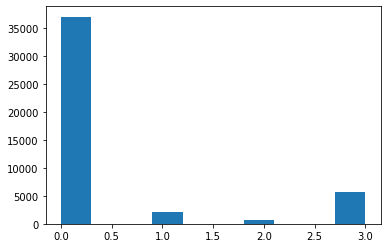

In [ ]:
kmeans4 = MiniBatchKMeans(n_clusters=4, random_state=0)
labels4 = kmeans4.fit_predict(values)
plt.hist(labels4)

In [ ]:
len(labels4)

45497

In [ ]:
pca = PCA(n_components=2).fit_transform(values)

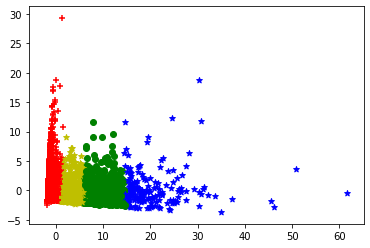

In [ ]:
for i in range(0, 12000):
    if labels4[i] == 0:
        c1 = plt.scatter(pca[i, 0], pca[i, 1], c='r', marker='+')
    elif labels4[i] == 1:
        c2 = plt.scatter(pca[i, 0], pca[i, 1], c='g', marker='o')
    elif labels4[i] == 2:
        c3 = plt.scatter(pca[i, 0], pca[i, 1], c='b', marker='*')
    elif labels4[i] == 3:
        c3 = plt.scatter(pca[i, 0], pca[i, 1], c='y', marker='*')

In [ ]:
bill_data_without_nan['Cluster'] = labels4

In [ ]:
clusters = [i for i in range(0,4)]
tags_by_cluster = {key: [] for key in clusters}
for i, row in bill_data_without_nan.iterrows():
  row_tags = row[row != 0].index
  row_cluster = row['Cluster']
  for tag in row_tags:
    if tag not in tags_by_cluster[row_cluster]:
      tags_by_cluster[row_cluster].append(tag)
print(tags_by_cluster)

{0: ['прокладки', 'пакеты', 'упаковка', 'прочее', 'красота и здоровье', 'личная гигиена', 'single', 'тампоны', 'зубная паста', 'compak', 'уход за полостью рта', 'пятерочка', 'duonight', 'ultra', 'forp&g', 'гигиена волос', 'шампунь для волос', 'кондиционер для белья', 'хозяйственные товары', 'уход за бельем', 'дезодорант/антиперсперант', 'гель', 'бакалея', 'фрукты', 'продукты', 'банан', 'гель для стирки', 'овощи/фрукты/ягоды', 'рисовая', 'крупа и бобовые', 'окрашивание волос', 'гель для бритья', 'средство для бритья', 'краска для волос', 'книга', 'бальзам для волос', 'средство для мытья полов', 'детский', 'средства для мытья кухни', 'средства для мытья посуды', 'нейтрал', 'средства для полов/ковров/мебели', 'жидкость', 'стиральный порошок', 'сахар', 'экстра защ', 'томаты', 'овощи', 'singlenight', 'апельсин', 'трусики-подгузники', 'подгузники/пеленки/салфетки', 'уход за ребенком', 'platinum', 'мыло', 'твердое мыло', 'зубная щетка', 'товары для животных', 'корм', 'корм для кошек', 'универ

In [ ]:
for cluster in clusters:
  print(cluster, len(tags_by_cluster[cluster]), tags_by_cluster[cluster])

0 684 ['прокладки', 'пакеты', 'упаковка', 'прочее', 'красота и здоровье', 'личная гигиена', 'single', 'тампоны', 'зубная паста', 'compak', 'уход за полостью рта', 'пятерочка', 'duonight', 'ultra', 'forp&g', 'гигиена волос', 'шампунь для волос', 'кондиционер для белья', 'хозяйственные товары', 'уход за бельем', 'дезодорант/антиперсперант', 'гель', 'бакалея', 'фрукты', 'продукты', 'банан', 'гель для стирки', 'овощи/фрукты/ягоды', 'рисовая', 'крупа и бобовые', 'окрашивание волос', 'гель для бритья', 'средство для бритья', 'краска для волос', 'книга', 'бальзам для волос', 'средство для мытья полов', 'детский', 'средства для мытья кухни', 'средства для мытья посуды', 'нейтрал', 'средства для полов/ковров/мебели', 'жидкость', 'стиральный порошок', 'сахар', 'экстра защ', 'томаты', 'овощи', 'singlenight', 'апельсин', 'трусики-подгузники', 'подгузники/пеленки/салфетки', 'уход за ребенком', 'platinum', 'мыло', 'твердое мыло', 'зубная щетка', 'товары для животных', 'корм', 'корм для кошек', 'унив

Число кластеров 5

(array([36803.,  1960.,   983.,  5338.,   413.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

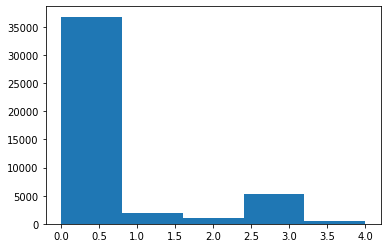

In [ ]:
kmeans5 = MiniBatchKMeans(n_clusters=5, random_state=0)
labels5 = kmeans5.fit_predict(values)
plt.hist(labels5, bins=5)

Число кластеров 6

(array([ 6476.,   960., 29120.,  1628.,  2444.,  4869.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

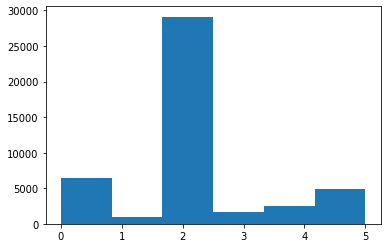

In [ ]:
kmeans6 = MiniBatchKMeans(n_clusters=6, random_state=0)
labels6 = kmeans6.fit_predict(values)
plt.hist(labels6, bins=6)

### DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

Дальше код, который оч долго выполняется :/

In [ ]:
dbscan = DBSCAN()
dbscan.fit_predict(values)

array([ 0, -1, -1, ...,  9, 12, -1])

In [ ]:
np.unique(dbscan.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [ ]:
pca = PCA(n_components=2).fit_transform(values)

KeyboardInterrupt: ignored

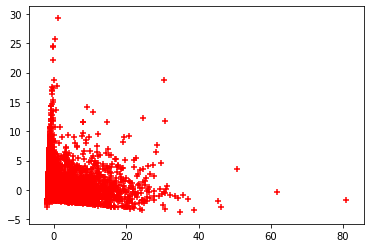

In [ ]:
for i in range(0, pca.shape[0]):
    plt.scatter(pca[i, 0], pca[i, 1], c='r', marker='+')

### Группировка по пользователям

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Case Data.csv")

In [ ]:
data

,﻿id чека,Дата и время,ИНН,IDПользователя,Товар,Бренд,Теги,Цена,Кол-во,Сумма,Кэшбэк
0,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,libresse natural care ultra прокладки normal 10ш,libresse,личная гигиена; красота и здоровье; прокладки,63.20,2.0,126.4,NaN
1,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,pampers трусики-подг 5 junior 12-17/15-18кг 96шт,pampers,NaN,1549.00,1.0,1549.0,154.9
2,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,salton губка/гл кож с дозатор(чер)(шанхай продак,NaN,NaN,135.20,1.0,135.2,NaN
3,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,soft ватные палочки 200шт пластиковый стакан(кот,NaN,NaN,31.20,1.0,31.2,NaN
4,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,моя цена/степной тюльпан туал/бум без вт(бумагар,NaN,NaN,4.90,1.0,4.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
309702,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,клеар(clear)200мл шамп.максимальный объем 12ш ...,clear,красота и здоровье; гигиена волос; шампунь для...,107.12,10.0,1071.2,NaN
309703,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,клеар(clear)400мл шамп. баланс жирности цитрус...,NaN,NaN,138.88,5.0,694.4,NaN
309704,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,клеар(clear)400мл шамп. основной уход 12ш (шт),NaN,NaN,139.00,15.0,2085.0,NaN
309705,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,клеар(clear)400мл шамп.2в1 активспорт мужс. (шт),clear,красота и здоровье; гигиена волос; шампунь для...,139.00,15.0,2085.0,NaN


In [ ]:
userid_col = 'IDПользователя'

In [ ]:
data = data.dropna(subset=['Теги'])

In [ ]:
data

,﻿id чека,Дата и время,ИНН,IDПользователя,Товар,Бренд,Теги,Цена,Кол-во,Сумма,Кэшбэк
0,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,libresse natural care ultra прокладки normal 10ш,libresse,личная гигиена; красота и здоровье; прокладки,63.20,2.0,126.40,NaN
5,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,пакет магнит косметик мал(пластиктрейд):300/2700,магнит косметик,упаковка; пакеты; прочее,3.12,1.0,3.12,NaN
7,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,discreet deo ежедн прокладки water,discreet,прокладки; личная гигиена; красота и здоровье,109.90,1.0,109.90,12.99
8,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,hochland сыр плавл чизбургер тост,hochland,молоко/сыр/яйца; сыр; продукты; плавленный,59.90,1.0,59.90,NaN
10,0000ff080b0a96172c95b3aa6f34980d,14.12.2019 18:33,2310031475,417fef3a42028cb612da47fff7b829f3,кубай питьевая вода негаз 5л(мерку,кубай,вода минеральная; напитки; продукты,56.90,1.0,56.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...
309693,5128dbb3ea9c658c01187063dfd48032,31.01.2020 18:13,5405191698,bb2ef9a68abdf03fe71aeb862d1173af,<procter&gamble>always ультра лайт 10 шт,always,красота и здоровье; прокладки; личная гигиена,81.04,1.0,81.04,16.20
309699,512949f4305bbb4f7dbf6a9400d82920,10.01.2020 12:25,7825706086,93711ffa10aa2d68cf14183c23517aab,48512 gil.кассеты mach-3 д/бритья 4шт,gillette,4; красота и здоровье; mach3; кассеты для брит...,745.99,1.0,745.99,74.60
309700,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,fairy 450мл для посуды чайное дерево и мята ак...,fairy,хозяйственные товары; нежруч; средства для мыт...,54.90,2.0,109.80,1.00
309702,512a6614980d409a7283410f797fdc3d,09.11.2019 14:21,"5,243E+11",8760e764842ad2608d747d8f5600db4b,клеар(clear)200мл шамп.максимальный объем 12ш ...,clear,красота и здоровье; гигиена волос; шампунь для...,107.12,10.0,1071.20,NaN


In [ ]:
type(data.values[1][6])

float

In [ ]:
data.columns

Index(['﻿id чека', 'Дата и время', 'ИНН', 'IDПользователя', 'Товар', 'Бренд',
       'Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк'],
      dtype='object')

In [ ]:
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

def tag_is_valid(tag):
  return tag not in ('не определено', 'прочее') and tag != ''

In [ ]:
def get_tags(row):
  tags = []
  splitted = []
  if isinstance(row['Теги'], str):
    splitted = row['Теги'].split('; ')

  #if isinstance(row['Бренд'], str):
  #  tags.append(row['Бренд'])

  for tag in splitted:
    if('/' in tag):
      subtags = tag.split('/')
      tags += subtags
    else:
      tags.append(tag)
  return tags

In [ ]:
type(data.values[0][5])

str

In [ ]:
all_columns = set()
excluded_columns = set()
good_tags = ['3 glocken die mag ich', '3minmir', '4embr', '4swirl', 'danoneperek032020', 'got2b', 'j7', 'mach3', '365 дней', '7 days']
for index, row in data.iterrows():
    tags = get_tags(row)

    for tag in tags:
      if tag in good_tags or (tag_is_valid(tag) and not hasNumbers(tag)):
        all_columns.add(tag)
      else:
        excluded_columns.add(tag)
all_columns.add("Electric toothbrush")

In [ ]:
excluded_columns

{'',
 '0,5',
 '0.05%',
 '0.33',
 '0.33л',
 '1',
 '1 б',
 '1 л',
 '1,5л',
 '1.5%',
 '10',
 '100',
 '1000 г',
 '12',
 '14',
 '15',
 '150 мл',
 '16',
 '170',
 '1б',
 '2',
 '2 б',
 '2 л',
 '2.5%',
 '200',
 '22',
 '23',
 '23+',
 '230',
 '250 мл',
 '26',
 '3',
 '3 б',
 '3.2%',
 '350 г',
 '360',
 '4',
 '4 б',
 '450 г',
 '5',
 '5 б',
 '500',
 '6',
 '635',
 '67%',
 '7',
 '72,5 %',
 '8',
 '800 г',
 '82,5%',
 '90',
 '900',
 'не определено',
 'пакеты',
 'прочее'}

In [ ]:
data_by_user = pd.DataFrame(index=data[userid_col].unique(), columns=all_columns)

In [ ]:
data_by_user.head()

,гауда,воск для депиляции,средство для чистки мебели,бумажные полотенца,уход за ногами,гренки,фильтрованное,каша детская,горох,корм для кошек,гуакамоле,пиво темное,капсулы для стирки,арахис,фруктовое,система,провансаль,брынза,средство для мытья посуды,салфетки для авто,кулинария,маслины,сыр плавленый,детмир,лак,фруктовый,sleep&play,игрушка,кисель,куриное,хлебобулочные изделия,сухофрукты,палочки кукурузные,жидкость,миска для животных,печень,заменитель сахара,катык,пицца,тоскана,...,simple,морс,белые,ополаскиватель для посудомоечных машин,кинза,мочалка для посуды,ликер,салфетки,кондиционер для волос,кетчунез,блины,масло растительное,mencare,аксессуары,булочка,крем-мыло,печенье,сахар,ватрушка,рис,васаби,бумага,полуфабрикаты,be-kind,quatro,базилик,чай,уход за полостью рта,жидкое мыло,щетка,икра кабачковая,уход за животными,сидр,традиционный,говядина,вешенки,виноградный,табачные изделия,зира,ветаптека
2700449a73d4cb9d8e909c706bf16fbe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417fef3a42028cb612da47fff7b829f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8142fe20d51c0875ab409128c0a6477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0ffc499d4246bec9b222260db8312abc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ea38f64bac275ad45c4ec07025f9086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_by_user = data_by_user.fillna(0)

In [ ]:
data_by_user

,гауда,воск для депиляции,средство для чистки мебели,бумажные полотенца,уход за ногами,гренки,фильтрованное,каша детская,горох,корм для кошек,гуакамоле,пиво темное,капсулы для стирки,арахис,фруктовое,система,провансаль,брынза,средство для мытья посуды,салфетки для авто,кулинария,маслины,сыр плавленый,детмир,лак,фруктовый,sleep&play,игрушка,кисель,куриное,хлебобулочные изделия,сухофрукты,палочки кукурузные,жидкость,миска для животных,печень,заменитель сахара,катык,пицца,тоскана,...,simple,морс,белые,ополаскиватель для посудомоечных машин,кинза,мочалка для посуды,ликер,салфетки,кондиционер для волос,кетчунез,блины,масло растительное,mencare,аксессуары,булочка,крем-мыло,печенье,сахар,ватрушка,рис,васаби,бумага,полуфабрикаты,be-kind,quatro,базилик,чай,уход за полостью рта,жидкое мыло,щетка,икра кабачковая,уход за животными,сидр,традиционный,говядина,вешенки,виноградный,табачные изделия,зира,ветаптека
2700449a73d4cb9d8e909c706bf16fbe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
417fef3a42028cb612da47fff7b829f3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c8142fe20d51c0875ab409128c0a6477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0ffc499d4246bec9b222260db8312abc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3ea38f64bac275ad45c4ec07025f9086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbd103679cb74c35dc7d67611b5aa80f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003ff42f0235896f0a0d192b8b3f985f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61dc575628bc9f956c461810af472c4e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6278fc5bcd4fc190ac46aaef7d419c9c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index, row in data.iterrows():
  target_row = data_by_user.loc[row[userid_col]]
  tags = get_tags(row)
  for tag in tags:
      if tag in all_columns:
          result_value = target_row[tag]
          if result_value != result_value:
              result_value = 1
          else:
              result_value += 1
          target_row[tag] = result_value
  if "электрическая" in tags and ("зубная щетка" in tags or "зубная щётка" in tags):
    target_row["Electric toothbrush"] += 1

In [ ]:
data_by_user["Electric toothbrush"].unique()

array([0, 1, 3, 2, 4])

In [ ]:
tags_count_by_user = pd.DataFrame(index = data[userid_col].unique(), columns=['Tags'])

In [ ]:
tags_count_by_user = tags_count_by_user.fillna(0)

In [ ]:
tags_count_by_user

,Tags
2700449a73d4cb9d8e909c706bf16fbe,0
417fef3a42028cb612da47fff7b829f3,0
c8142fe20d51c0875ab409128c0a6477,0
0ffc499d4246bec9b222260db8312abc,0
3ea38f64bac275ad45c4ec07025f9086,0
...,...
bbd103679cb74c35dc7d67611b5aa80f,0
003ff42f0235896f0a0d192b8b3f985f,0
61dc575628bc9f956c461810af472c4e,0
6278fc5bcd4fc190ac46aaef7d419c9c,0


In [ ]:
data_by_user.shape[1]

873

In [ ]:
data_by_user_proc = data_by_user.copy()

In [ ]:
threshold = 0.05
columns_cnt = data_by_user_proc.shape[1]
replaced_cnt = 0
left_cnt = 0
total_range = range(0, columns_cnt)
for row in data_by_user_proc.iterrows():
  total_sum = 0
  
  for i in total_range:
    total_sum += row[1][i]

  #print(total_sum)
  for i in total_range:
    #print(row[1][i] / total_sum)
    if(row[1][i] / total_sum < threshold):
      row[1][i] = 0
      replaced_cnt += 1
    else:
      row[1][i] = 1
      left_cnt += 1
      
print(replaced_cnt)
print(left_cnt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


17560210
137246


In [ ]:
data_by_user_proc.to_csv("data_by_user_proc.csv")
data_by_user_proc

,гауда,воск для депиляции,средство для чистки мебели,бумажные полотенца,уход за ногами,гренки,фильтрованное,каша детская,горох,корм для кошек,гуакамоле,пиво темное,капсулы для стирки,арахис,фруктовое,система,провансаль,брынза,средство для мытья посуды,салфетки для авто,кулинария,маслины,сыр плавленый,детмир,лак,фруктовый,sleep&play,игрушка,кисель,куриное,хлебобулочные изделия,сухофрукты,палочки кукурузные,жидкость,миска для животных,печень,заменитель сахара,катык,пицца,тоскана,...,simple,морс,белые,ополаскиватель для посудомоечных машин,кинза,мочалка для посуды,ликер,салфетки,кондиционер для волос,кетчунез,блины,масло растительное,mencare,аксессуары,булочка,крем-мыло,печенье,сахар,ватрушка,рис,васаби,бумага,полуфабрикаты,be-kind,quatro,базилик,чай,уход за полостью рта,жидкое мыло,щетка,икра кабачковая,уход за животными,сидр,традиционный,говядина,вешенки,виноградный,табачные изделия,зира,ветаптека
2700449a73d4cb9d8e909c706bf16fbe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
417fef3a42028cb612da47fff7b829f3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c8142fe20d51c0875ab409128c0a6477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0ffc499d4246bec9b222260db8312abc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3ea38f64bac275ad45c4ec07025f9086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbd103679cb74c35dc7d67611b5aa80f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003ff42f0235896f0a0d192b8b3f985f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61dc575628bc9f956c461810af472c4e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6278fc5bcd4fc190ac46aaef7d419c9c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_by_user_proc = pd.read_csv("data_by_user_proc.csv", index_col=0)
data_by_user_proc

,гауда,воск для депиляции,средство для чистки мебели,бумажные полотенца,уход за ногами,гренки,фильтрованное,каша детская,горох,корм для кошек,гуакамоле,пиво темное,капсулы для стирки,арахис,фруктовое,система,провансаль,брынза,средство для мытья посуды,салфетки для авто,кулинария,маслины,сыр плавленый,детмир,лак,фруктовый,sleep&play,игрушка,кисель,куриное,хлебобулочные изделия,сухофрукты,палочки кукурузные,жидкость,миска для животных,печень,заменитель сахара,катык,пицца,тоскана,...,simple,морс,белые,ополаскиватель для посудомоечных машин,кинза,мочалка для посуды,ликер,салфетки,кондиционер для волос,кетчунез,блины,масло растительное,mencare,аксессуары,булочка,крем-мыло,печенье,сахар,ватрушка,рис,васаби,бумага,полуфабрикаты,be-kind,quatro,базилик,чай,уход за полостью рта,жидкое мыло,щетка,икра кабачковая,уход за животными,сидр,традиционный,говядина,вешенки,виноградный,табачные изделия,зира,ветаптека
2700449a73d4cb9d8e909c706bf16fbe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
417fef3a42028cb612da47fff7b829f3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c8142fe20d51c0875ab409128c0a6477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0ffc499d4246bec9b222260db8312abc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3ea38f64bac275ad45c4ec07025f9086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbd103679cb74c35dc7d67611b5aa80f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003ff42f0235896f0a0d192b8b3f985f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61dc575628bc9f956c461810af472c4e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6278fc5bcd4fc190ac46aaef7d419c9c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

(array([7481.,    0.,    0., 9848.,    0.,    0., 1400.,    0.,    0.,
        1543.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

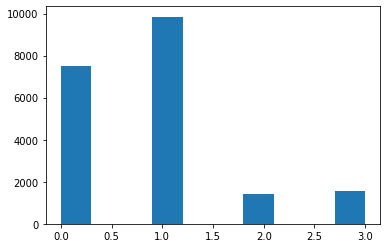

In [ ]:
kmeans4 = MiniBatchKMeans(n_clusters=4, random_state=0)
labels4 = kmeans4.fit_predict(data_by_user_proc)
plt.hist(labels4)

(array([ 8531.,     0.,     0.,     0.,     0., 10287.,     0.,     0.,
            0.,  1454.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

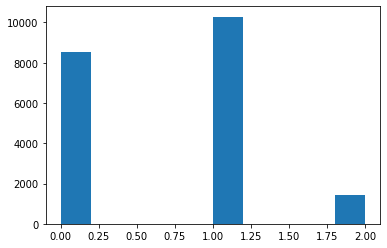

In [ ]:
kmeans3 = MiniBatchKMeans(n_clusters=3, random_state=0)
labels3 = kmeans3.fit_predict(data_by_user_proc)
plt.hist(labels3)

In [ ]:
pca = PCA(n_components=2).fit_transform(data_by_user_proc)

In [ ]:
for i in range(0, 12000):
    if labels3[i] == 0:
        c1 = plt.scatter(pca[i, 0], pca[i, 1], c='r', marker='+')
    elif labels3[i] == 1:
        c2 = plt.scatter(pca[i, 0], pca[i, 1], c='g', marker='o')
    elif labels3[i] == 2:
        c3 = plt.scatter(pca[i, 0], pca[i, 1], c='b', marker='*')
    elif labels3[i] == 3:
        c3 = plt.scatter(pca[i, 0], pca[i, 1], c='y', marker='*')

In [ ]:
data_by_user.describe()

,гауда,воск для депиляции,средство для чистки мебели,бумажные полотенца,уход за ногами,гренки,фильтрованное,каша детская,горох,корм для кошек,гуакамоле,пиво темное,капсулы для стирки,арахис,фруктовое,система,провансаль,брынза,средство для мытья посуды,салфетки для авто,кулинария,маслины,сыр плавленый,детмир,лак,фруктовый,sleep&play,игрушка,кисель,куриное,хлебобулочные изделия,сухофрукты,палочки кукурузные,жидкость,миска для животных,печень,заменитель сахара,катык,пицца,тоскана,...,simple,морс,белые,ополаскиватель для посудомоечных машин,кинза,мочалка для посуды,ликер,салфетки,кондиционер для волос,кетчунез,блины,масло растительное,mencare,аксессуары,булочка,крем-мыло,печенье,сахар,ватрушка,рис,васаби,бумага,полуфабрикаты,be-kind,quatro,базилик,чай,уход за полостью рта,жидкое мыло,щетка,икра кабачковая,уход за животными,сидр,традиционный,говядина,вешенки,виноградный,табачные изделия,зира,ветаптека
count,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,...,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000,20272.000000
mean,0.002220,0.000099,0.000148,0.018153,0.002910,0.001628,0.011346,0.031669,0.001973,0.250000,0.000049,0.001973,0.113013,0.003848,0.008929,0.000049,0.000049,0.000937,0.067285,0.000148,0.001431,0.010359,0.000395,0.008485,0.000987,0.000247,0.000345,0.013220,0.002368,0.085487,0.048441,0.001233,0.005180,0.092837,0.000148,0.004834,0.000296,0.000049,0.002072,0.000099,...,0.042176,0.002417,0.000099,0.000099,0.002170,0.000197,0.000543,0.502664,0.002812,0.000099,0.006413,0.043262,0.000049,0.004834,0.004933,0.018301,0.062204,0.045728,0.001381,0.001480,0.000099,0.200128,0.000247,0.000099,0.020718,0.001036,0.061267,0.360103,0.029154,0.000740,0.003502,0.006561,0.000987,0.000148,0.005229,0.000197,0.000049,0.031965,0.000493,0.000839
std,0.049115,0.009932,0.012164,0.148550,0.060757,0.052063,0.124338,0.304673,0.044378,1.070616,0.007023,0.056154,0.454864,0.067258,0.125522,0.007023,0.007023,0.030601,0.317405,0.012164,0.039080,0.109673,0.022207,0.133364,0.032929,0.015703,0.018580,0.140904,0.061986,0.349694,0.286891,0.037803,0.075796,0.379230,0.012164,0.078062,0.017202,0.007023,0.056151,0.014047,...,0.228559,0.053895,0.009932,0.009932,0.048613,0.014046,0.023288,1.274203,0.054784,0.009932,0.103980,0.242194,0.007023,0.074174,0.075486,0.159270,0.327979,0.239692,0.040931,0.038442,0.009932,0.637609,0.018581,0.009932,0.161589,0.032170,0.308394,1.009384,0.196382,0.027192,0.063893,0.085483,0.032929,0.012164,0.082343,0.014046,0.007023,0.238937,0.024326,0.030604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
clusters = [i for i in range(0,4)]
tags_by_cluster = {key: [] for key in clusters}
tidx = 0
for i, row in data_by_user.iterrows():
  row_tags = row[row != 0].index
  row_cluster = labels4[tidx]
  tidx += 1
  for tag in row_tags:
    # if tag not in tags_by_cluster[row_cluster]:
      tags_by_cluster[row_cluster].append(tag)
print(tags_by_cluster)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for cluster in clusters:
  print(cluster, len(tags_by_cluster[cluster]), tags_by_cluster[cluster])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def tags_frequency_by_cluster(tags_by_cluster):
    tags_freq = {key: [] for key in tags_by_cluster.keys()}
    for cluster, tags in tags_by_cluster.items():
        for tag in tags:
            if tag not in [item[0] for item in tags_freq[cluster]]:
                count_tag_in_cluster = tags.count(tag)
                tags_freq[cluster].append((tag, count_tag_in_cluster))
        tags_freq[cluster].sort(key=lambda y: -y[1])
    return tags_freq

In [ ]:
tags_freq = tags_frequency_by_cluster(tags_by_cluster)
print(tags_freq[0][:10])
print(tags_freq[1][:10])
print(tags_freq[2][:10])
print(tags_freq[3][:10])

[('хозяйственные товары', 2894), ('уход за бельем', 1874), ('кондиционер для белья', 1210), ('красота и здоровье', 1070), ('средства для мытья кухни', 974), ('средства для мытья посуды', 901), ('упаковка', 688), ('личная гигиена', 684), ('продукты', 684), ('forp&g', 576)]
[('красота и здоровье', 4285), ('личная гигиена', 3209), ('гигиена волос', 1742), ('шампунь для волос', 1541), ('уход за полостью рта', 1518), ('хозяйственные товары', 1369), ('мыло', 1242), ('упаковка', 1155), ('прокладки', 1155), ('дезодорант', 1139)]
[('личная гигиена', 6469), ('красота и здоровье', 6469), ('прокладки', 6469), ('продукты', 1951), ('хозяйственные товары', 1506), ('ежедневные', 1502), ('неззащ', 1272), ('упаковка', 1192), ('platinum', 1020), ('хлеб и сладости', 945)]
[('продукты', 5075), ('красота и здоровье', 4051), ('хлеб и сладости', 3653), ('молоко', 3441), ('сыр', 3409), ('яйца', 3407), ('личная гигиена', 3339), ('фрукты', 3162), ('овощи', 3159), ('ягоды', 3154)]


In [ ]:
len([el for el in labels4 if el==2])

12469

Legacy

In [ ]:
threshold = 3
replaced_cnt = 0
for row in user_ids.iterrows():
  for i in range(0, 846):
      if (row[1][i] <= threshold):
        row[1][i] = 0
        replaced_cnt += 1
print(replaced_cnt)